In [1]:
# %load /home/dan/.jupyter/firstcell.py
%load_ext autoreload
%autoreload 2

import sys
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#font = {'size'   : 14}
#mpl.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
from scipy import stats

import sklearn
import sklearn.cluster
import sklearn.datasets

import phate
import umap
import scprep
import magic
import meld
import graphtools as gt



In [2]:
home = os.path.expanduser('~')
data_path = os.path.join(home, 'scRNAseq', 'shekhar_data.pkl')
if not os.path.exists(data_path):
    scprep.io.download.download_google_drive(id='1pRYn62SOmmJxwVU0sSW7eBagRL2RJmx0',
                        destination=data_path)
    
cluster_path = os.path.join(home, 'scRNAseq', 'shekhar_clusters.pkl')
if not os.path.exists(cluster_path):
    scprep.io.download.download_google_drive(id='1FlNktWuJCka3pXOvNIFfRitGluZy2ftt',
                        destination=cluster_path)

In [3]:
data = pd.read_pickle(data_path)
clusters = pd.read_pickle(cluster_path)

In [4]:
data

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,mt-Tw,mt-Ty,n-R5-8s1,n-R5s173,n-R5s202,n-R5s25,n-R5s29,n-R5s33,n-R5s40,n-R5s8
Bipolar1_CCCACAAGACTA,0.0,0.000000,0.000000,0.0,0.0,1.573,1.112279,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_TCGCCTCGTAAG,0.0,0.000000,1.483967,0.0,0.0,0.000,1.483967,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CAAAGCATTTGC,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CTTTTGATTGAC,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_GCTCCAATGACA,0.0,2.401461,1.698089,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bipolar6_GGATCTTTCCAG,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar6_GACCCTATTCGT,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar6_GGTCTCTGAGCC,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar6_GATGTGCTTATT,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_pca = scprep.reduce.pca(data, n_components=37, method='dense')

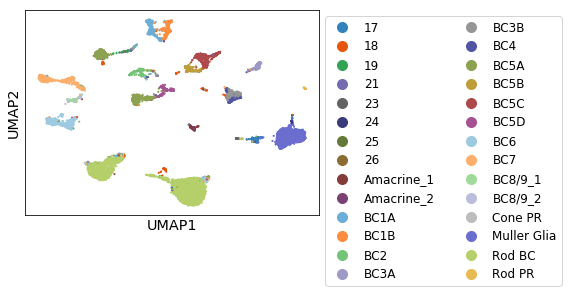

In [10]:
data_umap = umap.UMAP().fit_transform(data_pca)
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

Calculating PHATE...
  Running PHATE on 27499 cells and 37 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 29.93 seconds.
    Calculating affinities...
    Calculated affinities in 0.26 seconds.
  Calculated graph and diffusion operator in 30.24 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.78 seconds.
    Calculating KMeans...
    Calculated KMeans in 13.66 seconds.
  Calculated landmark operator in 17.37 seconds.
  Calculating optimal t...
    Automatically selected t = 14
  Calculated optimal t in 0.79 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.26 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 30.39 seconds.
Calculated PHATE in 79.06 seconds.


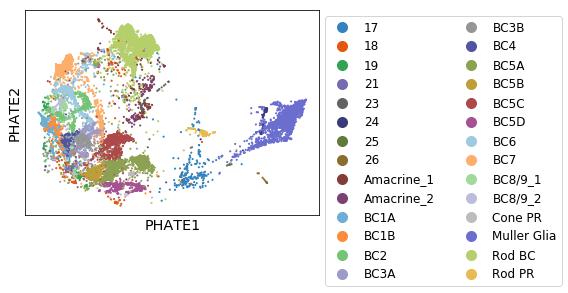

In [11]:
data_phate = phate.PHATE().fit_transform(data_pca)
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

### Running clustering algos

In [12]:
import phenograph

In [14]:
phenograph_clusters, _, _ = phenograph.cluster(data_pca)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 23.312906742095947 seconds
Jaccard graph constructed in 5.9754109382629395 seconds
Wrote graph to binary file in 3.202359914779663 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.928861
Louvain completed 21 runs in 12.98386263847351 seconds
PhenoGraph complete in 45.58163905143738 seconds


In [26]:
phenograph_clusters = phenograph_clusters[0]

In [16]:
#spectral_clusters = sklearn.cluster.SpectralClustering(n_clusters=30).fit_predict(data_pca)
kmeans_clusters = sklearn.cluster.KMeans(n_clusters=30).fit_predict(data_pca)

In [ ]:
G = gt.Graph(data_pca)
G_igraph = G.to_igraph()

In [32]:
import louvain
part = louvain.find_partition(G_igraph, louvain.RBConfigurationVertexPartition, 
                              weights="weight", resolution_parameter=1)
louvain_clusters = np.array(part.membership)

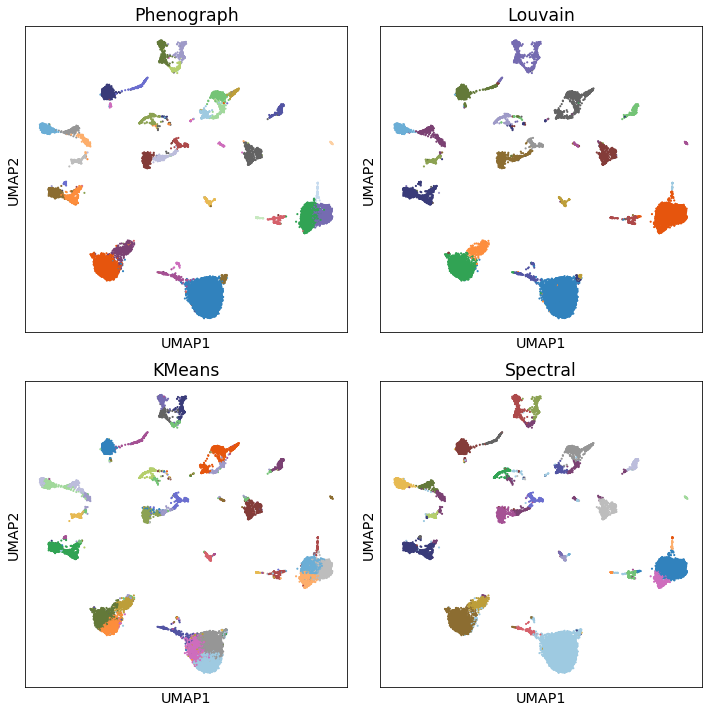

In [37]:
#data_umap = umap.UMAP().fit_transform(data_pca)

fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()
scprep.plot.scatter2d(data_umap, c=phenograph_clusters,
                      title='Phenograph',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[0])

scprep.plot.scatter2d(data_umap, c=louvain_clusters,
                      title='Louvain',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[1])

scprep.plot.scatter2d(data_umap, c=kmeans_clusters,
                      title='KMeans',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[2])

scprep.plot.scatter2d(data_umap, c=spectral_clusters,
                      title='Spectral',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[3])

fig.tight_layout()

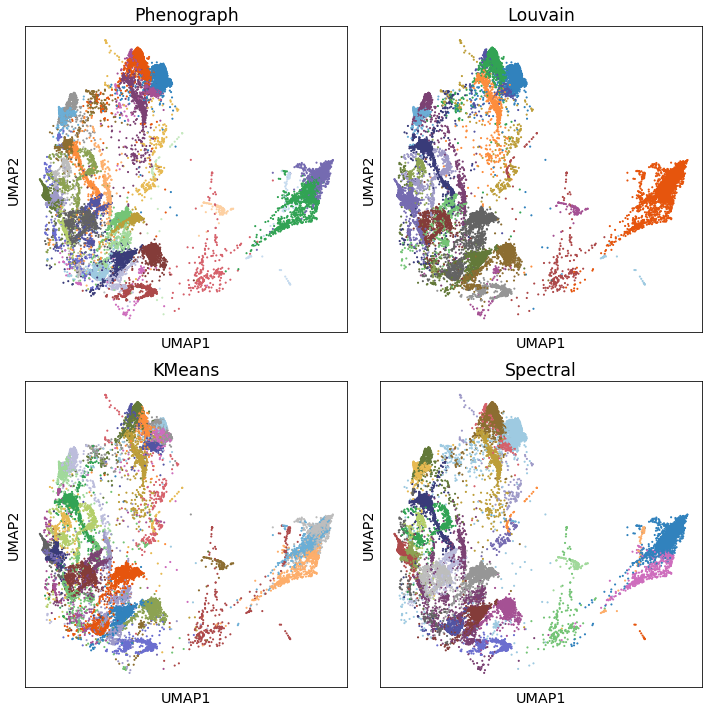

In [41]:
#data_phate = umap.UMAP().fit_transform(data_pca)

fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()
scprep.plot.scatter2d(data_phate, c=phenograph_clusters,
                      title='Phenograph',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[0])

scprep.plot.scatter2d(data_phate, c=louvain_clusters,
                      title='Louvain',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[1])

scprep.plot.scatter2d(data_phate, c=kmeans_clusters,
                      title='KMeans',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[2])

scprep.plot.scatter2d(data_phate, c=spectral_clusters,
                      title='Spectral',
                      legend=False, 
                      ticks=False, label_prefix='UMAP',
                      discrete=True,
                     ax=axes[3])

fig.tight_layout()

In [ ]:
G = gt.Graph(data_pca, decay=None)

In [34]:
spectral_clusters= sklearn.cluster.SpectralClustering(n_clusters=30, affinity='precomputed').fit_predict(G.K.toarray())

In [43]:
{'retinal':['Vsx2', 'Otx2', 'Scgn', 'Isl1', 'Grm6', 'Apoe', 'Pax6', 'Rho', 'Arr3'],
 'bipolar':['Tacr3', 'Syt2', 'Neto1', 'Irx6', 'Prkar2b', 'Grik1', 'Kcn4', 'Cabp5', 'Vsx1', 'Prkca'],
'bipolar'}

{'retinal': ['Vsx2',
  'Otx2',
  'Scgn',
  'Isl1',
  'Grm6',
  'Apoe',
  'Pax6',
  'Rho',
  'Arr3'],
 'bipolar': ['Tacr3',
  'Syt2',
  'Neto1',
  'Irx6',
  'Prkar2b',
  'Grik1',
  'Kcn4',
  'Cabp5',
  'Vsx1',
  'Prkca']}